In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pygame import mixer

pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
path=r"C:\Users\Acer\Downloads\archive (2)\train\Closed_Eyes\s0001_00001_0_0_0_0_0_01.png"
img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

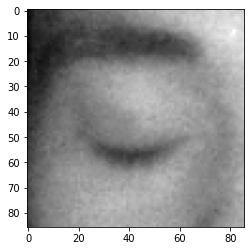

In [6]:
plt.imshow(img_array, cmap="gray")

In [7]:
img_array.shape

(86, 86)

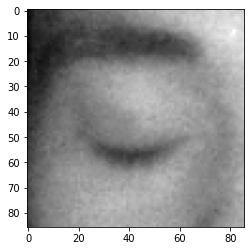

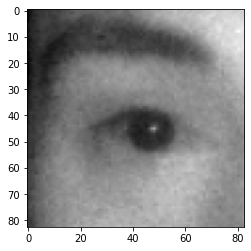

In [8]:
Datadirectory = r"C:\Users\Acer\Downloads\archive (2)\train"
Classes = ['Closed_Eyes', 'Open_Eyes']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

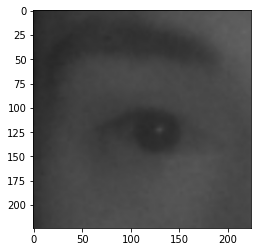

In [9]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [10]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [11]:
create_training_data()
print(len(training_data))

4000


In [12]:
random.shuffle(training_data)

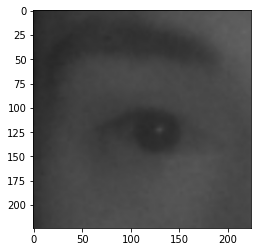

In [13]:
plt.imshow(new_array)

In [14]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X.shape

(4000, 224, 224, 3)

In [15]:
X = X/255.0
Y = np.array(y)

In [16]:
model = tf.keras.applications.mobilenet.MobileNet()

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-4].output

In [20]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [23]:
# new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# new_model.fit(X,Y, epochs = 5, validation_split = 0.1)

In [24]:
# new_model.save('my_model.h5')

In [25]:
new_model = tf.keras.models.load_model('my_model.h5')

In [26]:
img_array = cv2.imread(r"C:\Users\Acer\Downloads\archive (2)\train\Closed_Eyes\s0001_00004_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [27]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
X_input.shape

(1, 224, 224, 3)

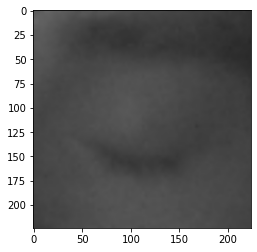

In [28]:
plt.imshow(new_array)

In [29]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[3.7722554e-11]], dtype=float32)

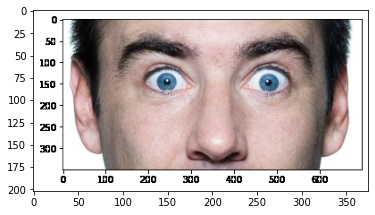

In [92]:
img = cv2.imread(r"C:\Users\Acer\Downloads\archive (2)\__results___41_1.png")
# img = cv2.imread(r"C:\Users\Acer\Downloads\qweqwewee.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [93]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

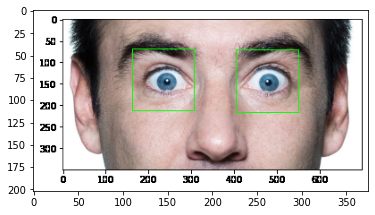

In [94]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
if len(eyes) == 0:
    print("eyes not detected")
else:
  for (x, y, w, h) in eyes:
    eyes_roi = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

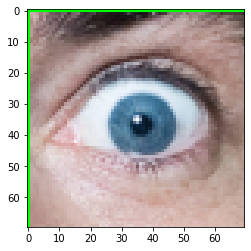

In [95]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [96]:
eyes_roi.shape

(70, 70, 3)

In [97]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [98]:
new_model.predict(final_img)

array([[1.]], dtype=float32)

In [38]:
new_model = tf.keras.models.load_model(r"C:\Users\Acer\Desktop\vscode\my_model.h5")

In [39]:
mixer.init()
sound= mixer.Sound(r"C:\Users\Acer\Downloads\Driver-drowsiness-detection-and-alerting-main\Driver-drowsiness-detection-and-alerting-main\Untitled.wav")
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
za_warudo=0
soundstop=0
alarming=0
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    (dimension_h,dimension_w,g) = frame.shape
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 7)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2) #faces
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray, 1.1, 7)
        if len(eyes) == 0:
                print("eyes not detected")
        else:
            for ex,ey,ew,eh in eyes:
                cv2.rectangle(frame,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(255,255,0),2) #eyes
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
            
    final_img = cv2.resize(eyes_roi, (224,224))
    final_img = np.expand_dims(final_img, axis=0)
    final_img = final_img/255.0

    Predictions = new_model.predict(final_img)
    
    if len(faces) == 0:
        status = 'No person found'
    else:
        if len(eyes) == 0 or Predictions<=0.13278767:
            status = 'Close'
            if za_warudo>=15:
                if alarming==0:
                    try:
                        sound.play(-1)
                        alarming=1
                    except:
                        pass
                soundstop=0
            else:
                za_warudo+=1
        else:
            status = 'Open'
            if za_warudo>0:
                za_warudo-=1
    soundstop+=1
    if soundstop>=15:
        sound.stop()
        alarming=0

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,'Eyes status: '+status,(50,50),font,1,(0,0,255),2)
    cv2.putText(frame,'Drowsiness count: '+str(za_warudo),(50,100),font,1,(0,0,255),2)
    if alarming==1:
        cv2.putText(frame,'ALARMING!!!',(143,285),font,2,(0,0,255),5)
    cv2.imshow('Drowsiness Detection',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        sound.stop()
        break

cap.release()
cv2.destroyAllWindows()

eyes not detected
